# Statistics and Analysis of Characters and Anime 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names.csv')

# Archive of Our Own
AO3 = pd.read_csv('AO3.csv')

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

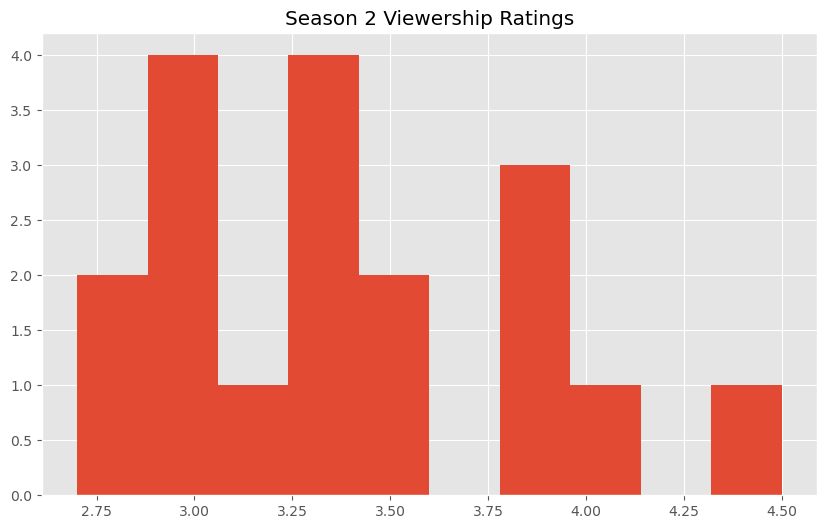

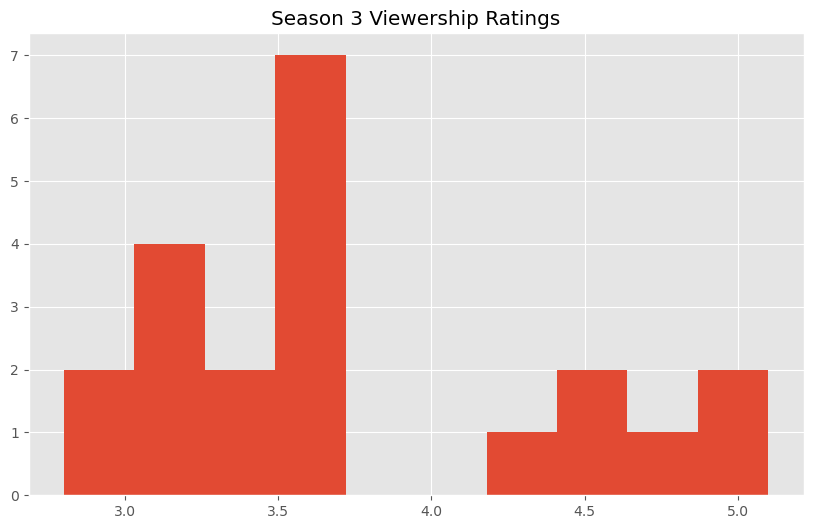

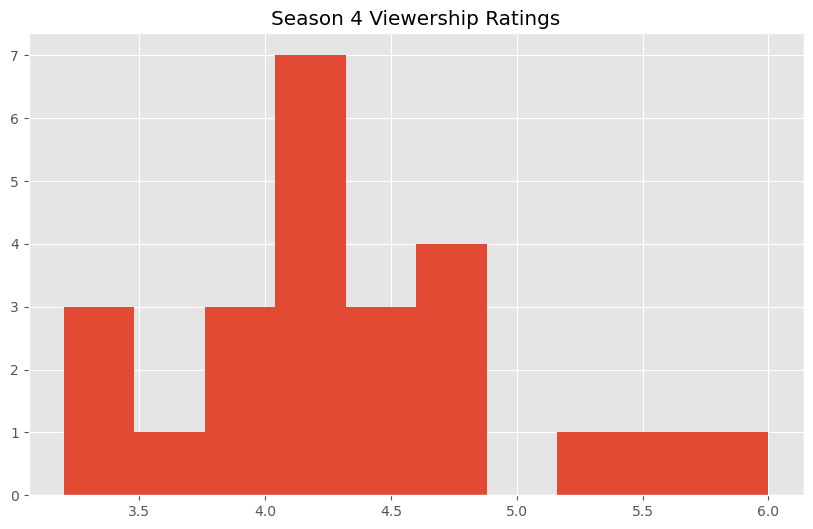

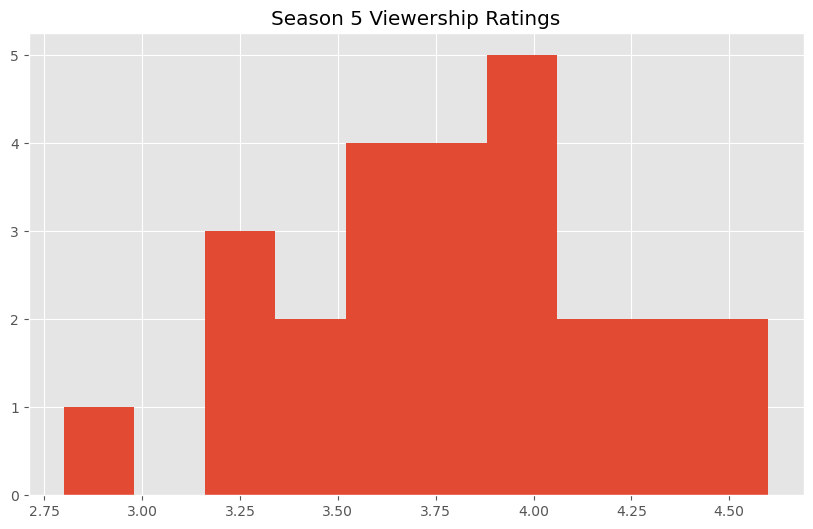

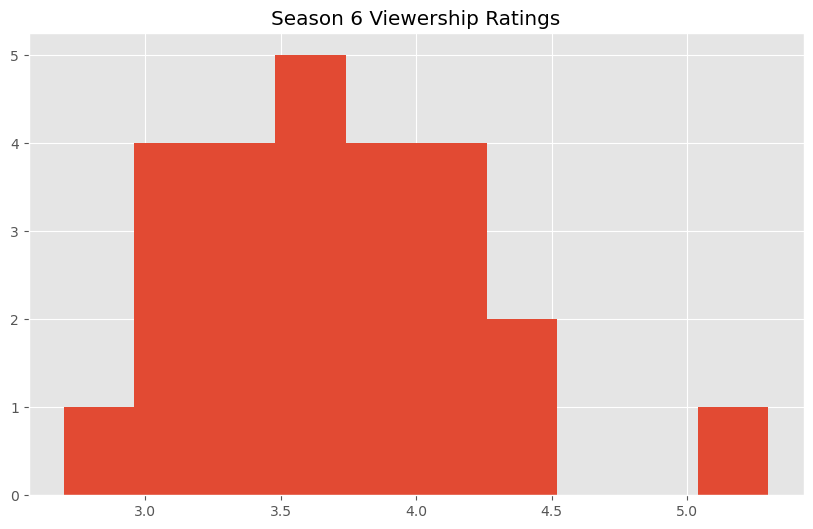

In [6]:
plt.hist(x='Viewership rating', data=season_two_anime)
plt.title('Season 2 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_three_anime)
plt.title('Season 3 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_four_anime)
plt.title('Season 4 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_five_anime)
plt.title('Season 5 Viewership Ratings')
plt.show()

plt.hist(x='Viewership rating', data=season_six_anime)
plt.title('Season 6 Viewership Ratings')
plt.show()

In [4]:
season_two_anime

,No.overall,No. inseason,Title,Storyboarded by,Directed by,Written by,Viewership rating,Original_Air_Date,English_Air_Date
0,13.5,0,"""Hero Notebook""Transcription: ""Hīrō Nōto"" (Jap...",NaN,Nobutaka Yoda,NaN,3.3,2017-03-25,NaN
1,14.0,1,"""That's the Idea, Ochaco""Transcription: ""Sou i...",Kenji Nagasaki,Tetsuya Miyanishi[c],Yōsuke Kuroda,3.4,2017-04-01,2018-08-11
2,15.0,2,"""Roaring Sports Festival""Transcription: ""Unare...",Kō Matsuo,Tomo Ōkubo,Yōsuke Kuroda,3.5,2017-04-08,2018-08-18
3,16.0,3,"""In Their Own Quirky Ways""Transcription: ""Minn...",Shinji Ishihira,Hitomi Ezoe,Yōsuke Kuroda,3.9,2017-04-15,2018-08-25
4,17.0,4,"""Strategy, Strategy, Strategy""Transcription: ""...",Kō Matsuo,Takudai Kakuchi,Yōsuke Kuroda,NaN,2017-04-22,2018-09-08
5,18.0,5,"""Cavalry Battle Finale""Transcription: ""Kibasen...",Ken Ōtsuka,Tetsuya Miyanishi,Yōsuke Kuroda,NaN,2017-04-29,2018-09-15
6,19.0,6,"""The Boy Born with Everything""Transcription: ""...",Seiji Mizushima,Yōhei Fukui,Yōsuke Kuroda,3.5,2017-05-06,2018-09-22
7,20.0,7,"""Victory or Defeat""Transcription: ""Kachimake"" ...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,3.4,2017-05-13,2018-09-29
8,21.0,8,"""Battle on, Challengers!""Transcription: ""Furue...",Kō Matsuo,Satoshi Takafuji,Yōsuke Kuroda,3.0,2017-05-20,2018-10-06
9,22.0,9,"""Bakugo vs. Uraraka""Transcription: ""Bakugō vs....",Shinji Ishihira,Hitomi Ezoe,Yōsuke Kuroda,NaN,2017-05-27,2018-10-13
